In [1]:
import scanpy as sc
import numpy as np
import random
import matplotlib.pyplot as plt
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)
random.seed(66)

data_path = "E:/Vagus_UPB/"

sample_IDs = ["GSM5770202", "GSM5770203", "GSM5770204", "GSM5770205", "GSM5770206", "GSM5770207", "GSM5770208", "GSM5770209"]

accum_adata, cell_count = [], 0
for sample in sample_IDs:
    raw_path = data_path + sample
    temp_adata = sc.read_10x_mtx(
        raw_path,
                              )
    temp_adata.var_names_make_unique()
    accum_adata.append(temp_adata)
    cell_count += temp_adata.n_obs

adata = accum_adata[0].concatenate(*accum_adata[1:], batch_categories=sample_IDs)
adata

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


AnnData object with n_obs × n_vars = 64000 × 31065
    obs: 'batch'
    var: 'gene_ids', 'feature_types'

In [2]:
transgenes = ["QZ1", "QZ2", "QZ4", "QZ6", "tdTomato", "WPRE"]

for g in transgenes:
    adata.obs.loc[:, g] = adata[:, g].X.toarray().astype(int)

genes = [g for g in adata.var_names if g not in transgenes]
adata = adata[:, genes]

In [3]:
np.sum(adata.obs[["QZ1", "QZ2", "QZ4", "QZ6", "tdTomato", "WPRE"]], axis=0)

QZ1         169104
QZ2          62525
QZ4         107731
QZ6          17998
tdTomato       439
WPRE          7467
dtype: int64

In [4]:
sc.pp.filter_cells(adata, min_genes=500)
# sc.pp.filter_genes(adata, min_cells=8)

filtered out 19 cells that have less than 500 genes expressed


C:\Ryan\GitHub\scanpy\scanpy\preprocessing\_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


In [5]:
mito_genes = adata.var_names.str.startswith('mt-')
adata.obs['percent_mito'] = 100 * (np.sum(adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1))

In [6]:
adata.obs["n_UMIs"] = np.sum(adata.X, axis=1).astype(int)

In [7]:
adata = adata[adata.obs["percent_mito"] < 10, :]
adata = adata[adata.obs["n_genes"] < 8000, :]
# adata = adata[adata.obs["n_UMIs"] < 40000, :]

c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


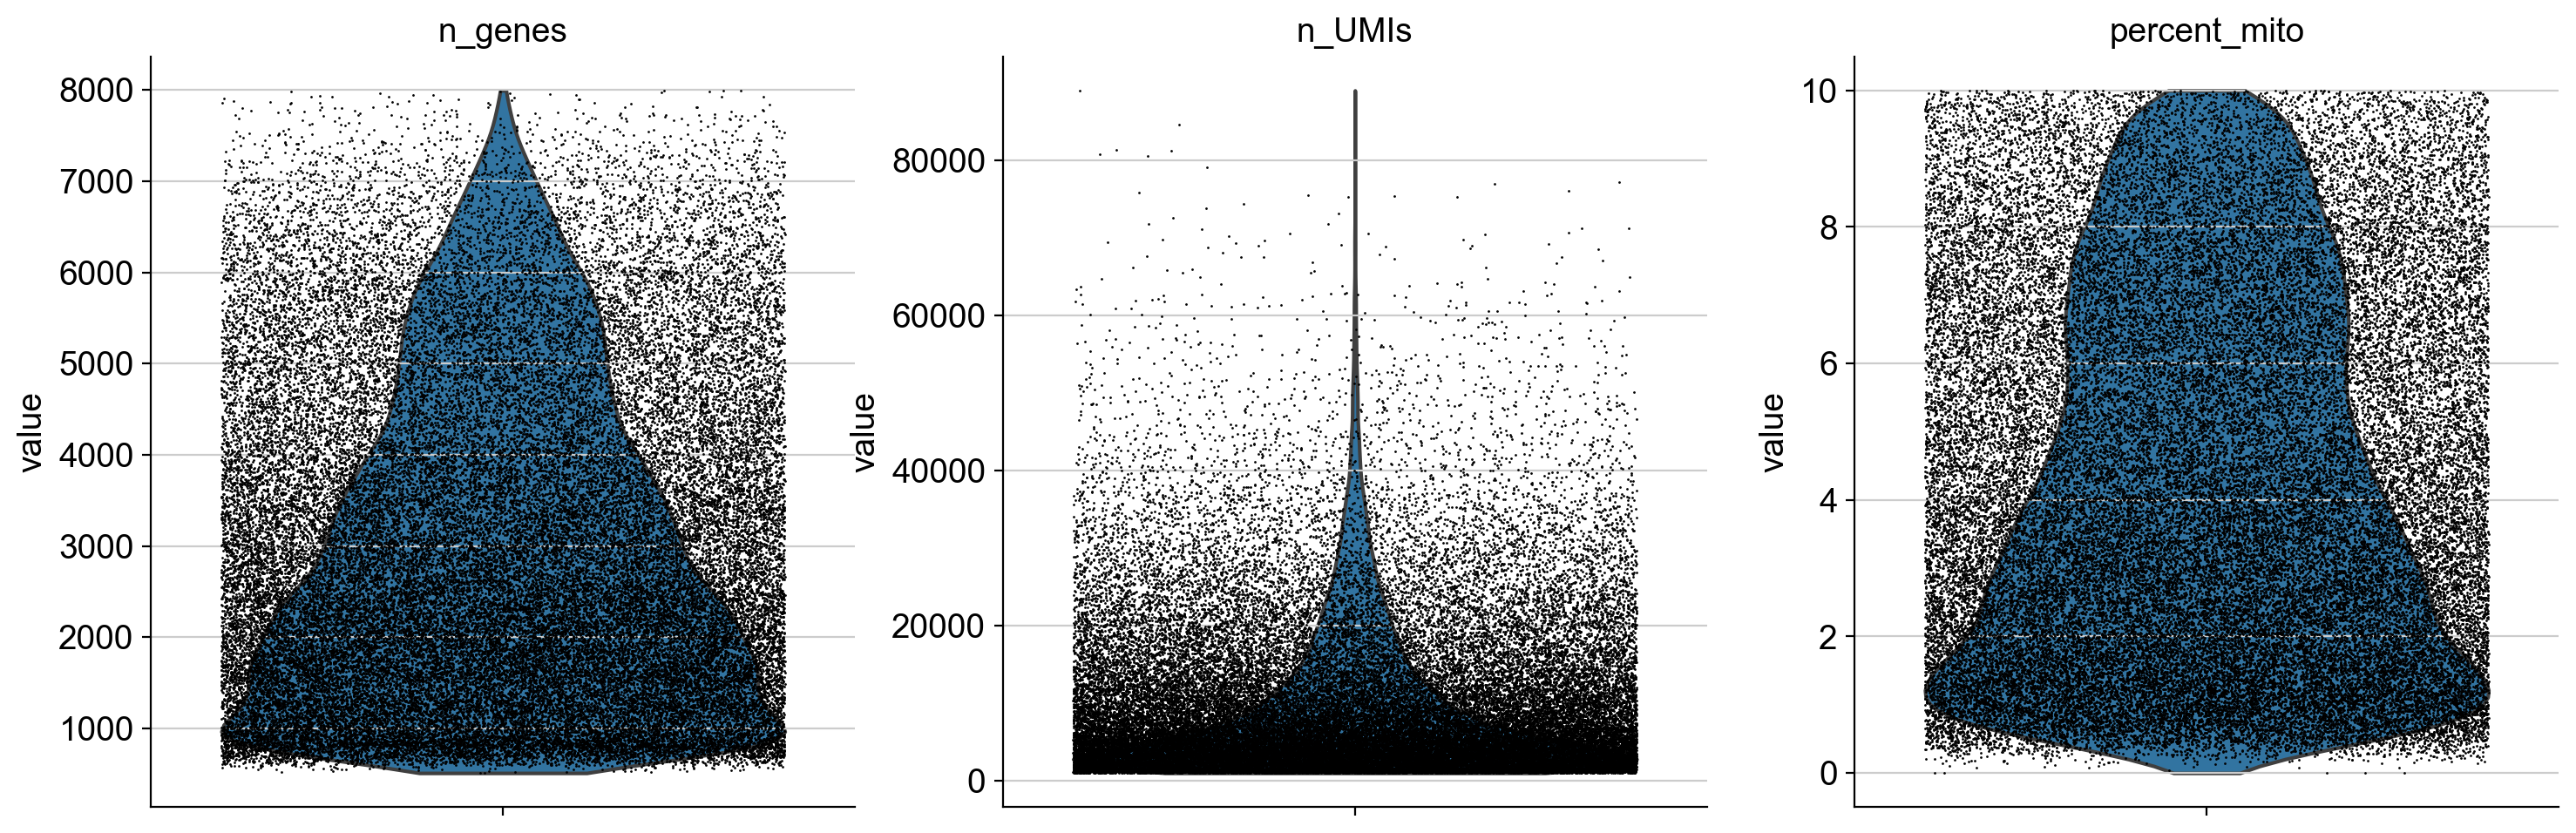

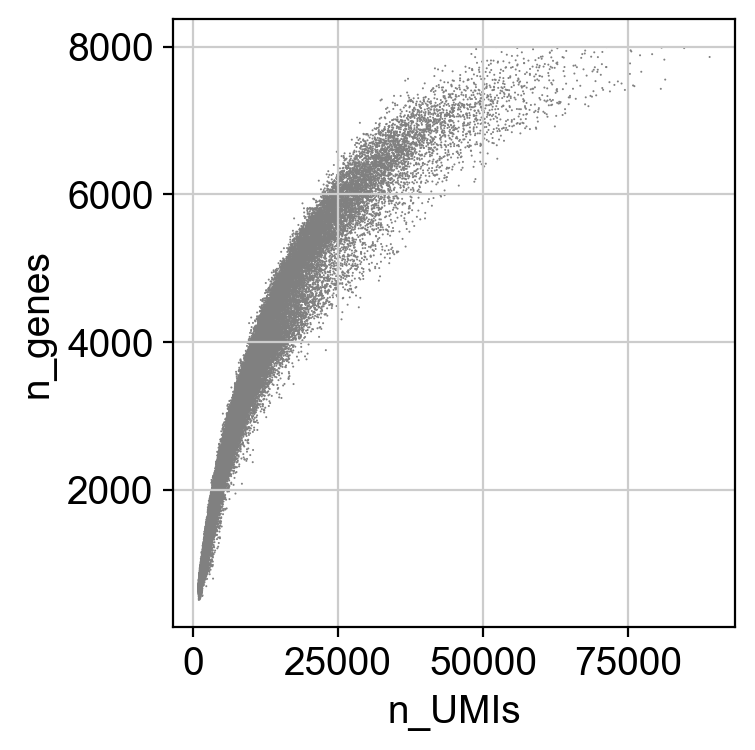

In [8]:
sc.pl.violin(adata, ["n_genes", "n_UMIs", "percent_mito"], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x="n_UMIs", y="n_genes")

In [9]:
np.sum(adata.obs[["QZ1", "QZ2", "QZ4", "QZ6", "tdTomato", "WPRE"]], axis=0)

QZ1         127365
QZ2          51897
QZ4          50424
QZ6          10509
tdTomato       340
WPRE          7053
dtype: int64

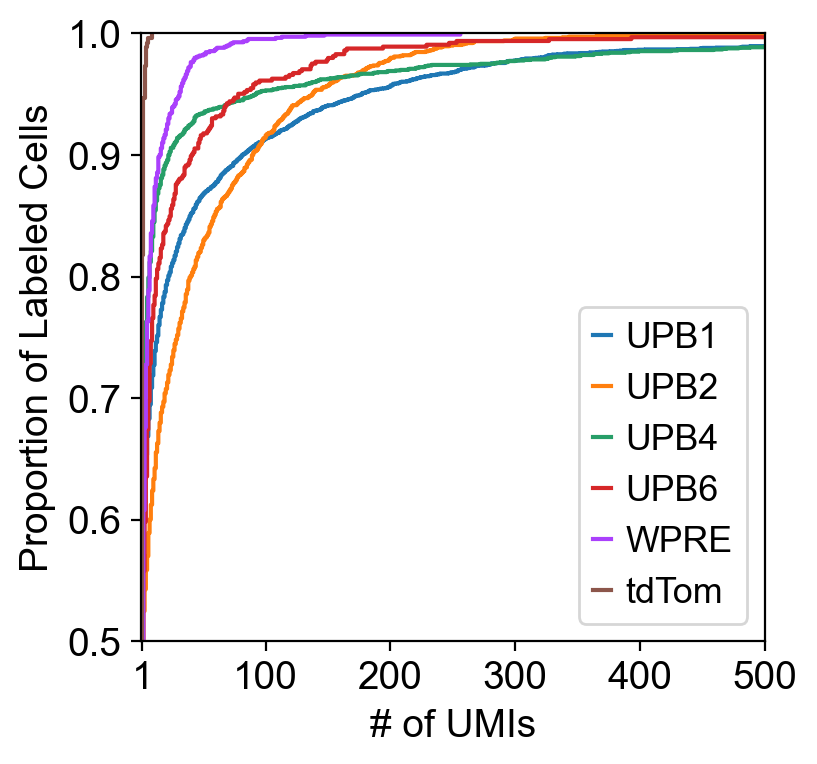

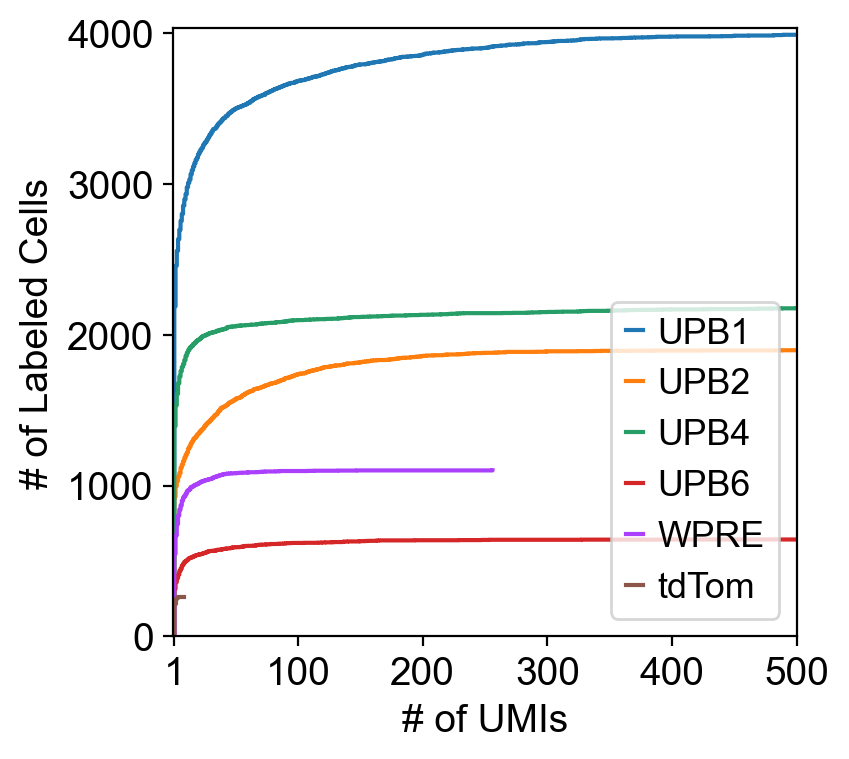

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

upbs = ["QZ1", "QZ2", "QZ4", "QZ6", "WPRE", "tdTomato"]

fig, ax = plt.subplots()

for upb in upbs:
    upbs_mask = np.array(adata.obs[upb]) > 0
    adata_upb = adata[upbs_mask, :]
    sns.ecdfplot(data=np.array(adata_upb.obs[upb]))
ax.grid(False)
ax.set_xlim((0, 500))
ax.set_xticks((1, 100, 200, 300, 400, 500))
ax.set_xlabel("# of UMIs")
ax.set_ylim((0.5, 1))
ax.set_ylabel("Proportion of Labeled Cells")
ax.legend(["UPB1", "UPB2", "UPB4", "UPB6", "WPRE", "tdTom"], loc="lower right")
plt.show(block=False)

fig, ax = plt.subplots()

for upb in upbs:
    upbs_mask = np.array(adata.obs[upb]) > 0
    adata_upb = adata[upbs_mask, :]
    sns.ecdfplot(data=np.array(adata_upb.obs[upb]), stat="count")
ax.grid(False)
ax.set_xlim((0, 500))
ax.set_xticks((1, 100, 200, 300, 400, 500))
ax.set_xlabel("# of UMIs")
ax.set_ylabel("# of Labeled Cells")
ax.legend(["UPB1", "UPB2", "UPB4", "UPB6", "WPRE", "tdTom"], loc="lower right")
plt.show(block=False)

In [19]:
adata

AnnData object with n_obs × n_vars = 56556 × 31059
    obs: 'batch', 'QZ1', 'QZ2', 'QZ4', 'QZ6', 'tdTomato', 'WPRE', 'n_genes', 'percent_mito', 'n_UMIs'
    var: 'gene_ids', 'feature_types'